**Data Loading and Cleaning**


In [3]:
import pandas as pd
from google.colab import files

# Load the data
try:
    df = pd.read_csv('/content/reddit_data.csv')
except FileNotFoundError:
    print("Error: reddit_data.csv not found in /content/")
    exit()

# Sort by date
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values(by='Date')

# Remove specified columns
df = df.drop(['Score', 'Comments', 'URL'], axis=1, errors='ignore')

# Clean and preprocess the data (example)
# Handle missing values
df = df.fillna('')

# Remove special characters or noise (example)
df['Title'] = df['Title'].str.replace('[^a-zA-Z0-9\s]', '', regex=True)


# You can add more preprocessing steps as needed
# Example: Convert text to lowercase
df['Title'] = df['Title'].str.lower()


# Save the cleaned and preprocessed data to a new CSV file
df.to_csv('/content/cleaned_reddit_data.csv', index=False)


# Download the cleaned file
files.download('/content/cleaned_reddit_data.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**Exploratory Data Analysis**

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 268 entries, 0 to 267
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    268 non-null    object
 1   Title   268 non-null    object
 2   Text    268 non-null    object
dtypes: object(3)
memory usage: 6.4+ KB
None
                       Date  \
count                   268   
unique                  208   
top     2024-08-01 20:33:42   
freq                      4   

                                                    Title  \
count                                                 268   
unique                                                208   
top     apple sales rise 5 topping estimates as ipad a...   
freq                                                    4   

                                                     Text  
count                                                 268  
unique                                                184  
top     This is the daily dis

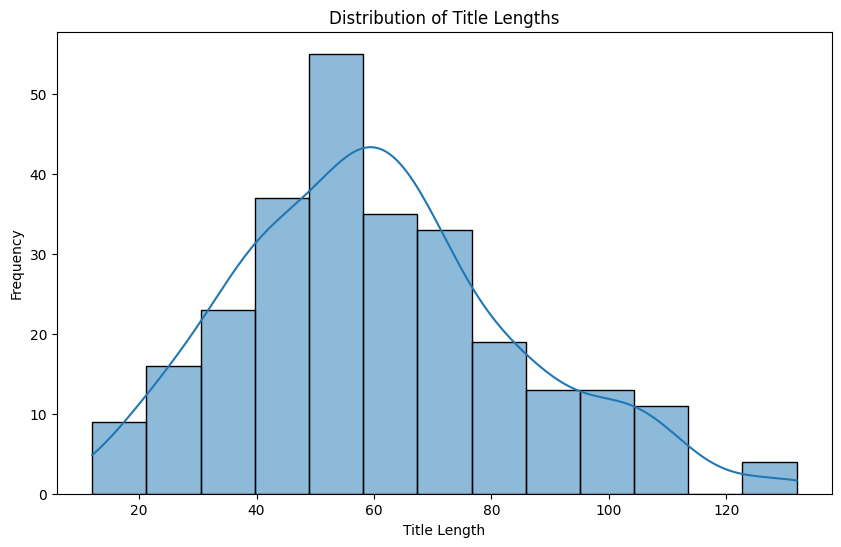

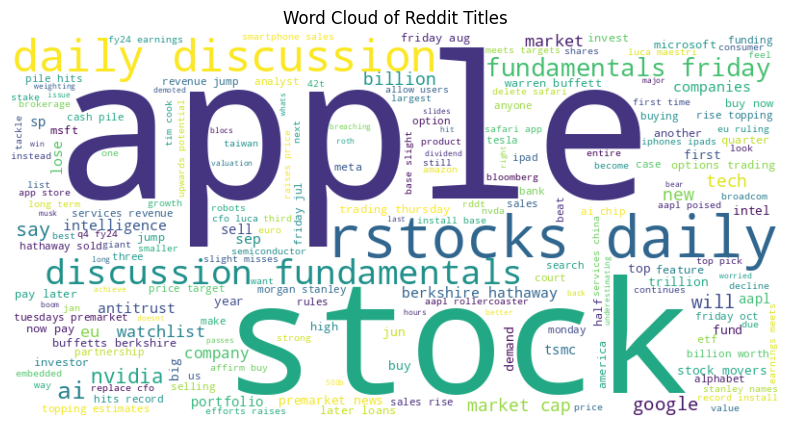

In [6]:


import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the cleaned data
try:
    df = pd.read_csv('/content/cleaned_reddit_data.csv')
except FileNotFoundError:
    print("Error: cleaned_reddit_data.csv not found in /content/")
    exit()

# Display basic info
print(df.info())
print(df.describe())

# Analyze the 'Title' column
print("\nMost frequent words in Titles:")
from collections import Counter
words = ' '.join(df['Title']).split()
word_counts = Counter(words)
print(word_counts.most_common(10))  # Print the 10 most common words

# Visualizations

# Plot title length distribution
plt.figure(figsize=(10, 6))
df['title_length'] = df['Title'].str.len()
sns.histplot(df['title_length'], kde=True)
plt.title('Distribution of Title Lengths')
plt.xlabel('Title Length')
plt.ylabel('Frequency')
plt.show()
# Word cloud (requires wordcloud library)
#!pip install wordcloud
from wordcloud import WordCloud

text = " ".join(title for title in df.Title)
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud of Reddit Titles")
plt.show()

**Sentiment Analysis**

In [5]:


!pip install nltk
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Import pandas
import pandas as pd # Importing pandas here makes it available in this cell's scope

# Load the cleaned data
try:
    df = pd.read_csv('/content/cleaned_reddit_data.csv')
except FileNotFoundError:
    print("Error: cleaned_reddit_data.csv not found in /content/")
    exit()

# Initialize VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Function to get sentiment scores
def get_sentiment(text):
    scores = analyzer.polarity_scores(text)
    return scores['compound']

# Apply sentiment analysis to the 'Title' column
df['sentiment_score'] = df['Title'].apply(get_sentiment)

# Categorize sentiment
df['sentiment'] = ''
df.loc[df['sentiment_score'] >= 0.05, 'sentiment'] = 'Positive'
df.loc[df['sentiment_score'] <= -0.05, 'sentiment'] = 'Negative'
df.loc[(df['sentiment_score'] > -0.05) & (df['sentiment_score'] < 0.05), 'sentiment'] = 'Neutral'

# Save the DataFrame with sentiment analysis results to a new CSV file
df.to_csv('/content/reddit_data_with_sentiment.csv', index=False)

# Download the file
from google.colab import files # Make sure to import files if it's not already imported
files.download('/content/reddit_data_with_sentiment.csv')

# Display the first few rows with sentiment scores
print(df[['Title', 'sentiment_score', 'sentiment']].head())

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

                                               Title  sentiment_score  \
0  fdic says 63 lenders on brink of insolvency bu...           0.0000   
1  nvda ranked among the top 10 sp 500 performing...           0.2023   
2  can someone please tell me how i as an america...           0.3182   
3  nvidia briefly passes 3 trillion market cap on...           0.0000   
4  rstocks daily discussion  options trading thur...           0.0000   

  sentiment  
0   Neutral  
1  Positive  
2  Positive  
3   Neutral  
4   Neutral  


**Train-Test Split:**

X_train shape: (214, 4)
X_test shape: (54, 4)
y_train shape: (214,)
y_test shape: (54,)


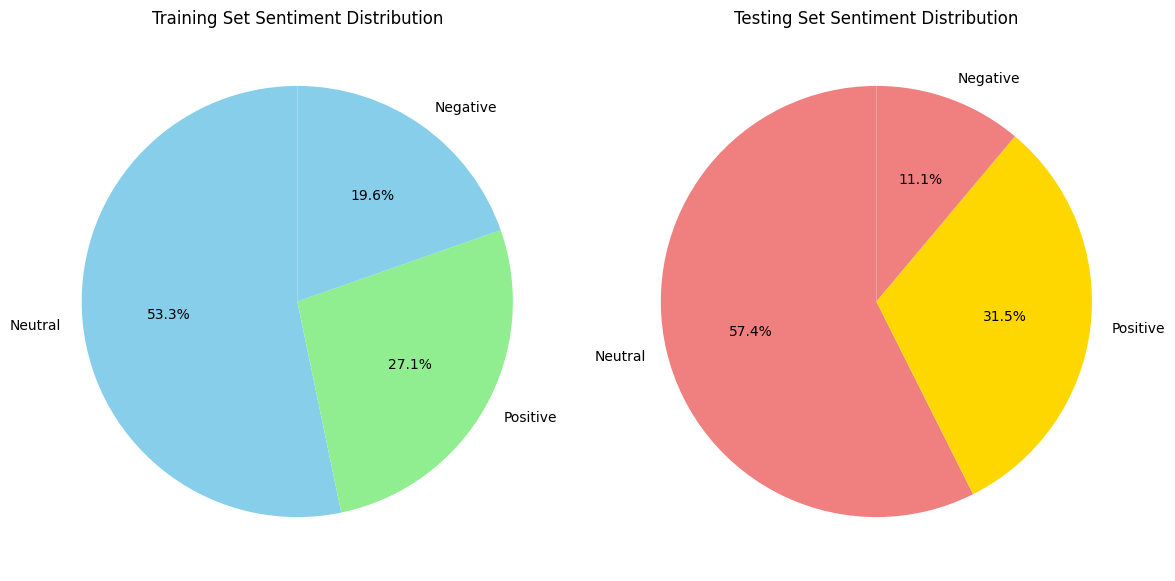

In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Load the data
try:
    df = pd.read_csv('/content/reddit_data_with_sentiment.csv')
except FileNotFoundError:
    print("Error: reddit_data_with_sentiment.csv not found in /content/")
    exit()

# Assuming 'sentiment' is your target variable
X = df.drop('sentiment', axis=1)  # Features
y = df['sentiment']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # 80% train, 20% test

# Example: Print the shapes of the resulting sets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

# Calculate sentiment distribution for training and testing sets
train_sentiment_counts = y_train.value_counts()
test_sentiment_counts = y_test.value_counts()

# Pie chart for training set
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)  # Training set pie chart
plt.pie(
    train_sentiment_counts,
    labels=train_sentiment_counts.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=['skyblue', 'lightgreen']
)
plt.title("Training Set Sentiment Distribution")

# Pie chart for test set
plt.subplot(1, 2, 2)  # Testing set pie chart
plt.pie(
    test_sentiment_counts,
    labels=test_sentiment_counts.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=['lightcoral', 'gold']
)
plt.title("Testing Set Sentiment Distribution")

# Show the plots
plt.tight_layout()
plt.show()




**Model Selection**

**Logistic Regression**

Accuracy: 0.7962962962962963
              precision    recall  f1-score   support

    Negative       1.00      0.67      0.80         6
     Neutral       0.75      0.97      0.85        31
    Positive       0.90      0.53      0.67        17

    accuracy                           0.80        54
   macro avg       0.88      0.72      0.77        54
weighted avg       0.82      0.80      0.78        54



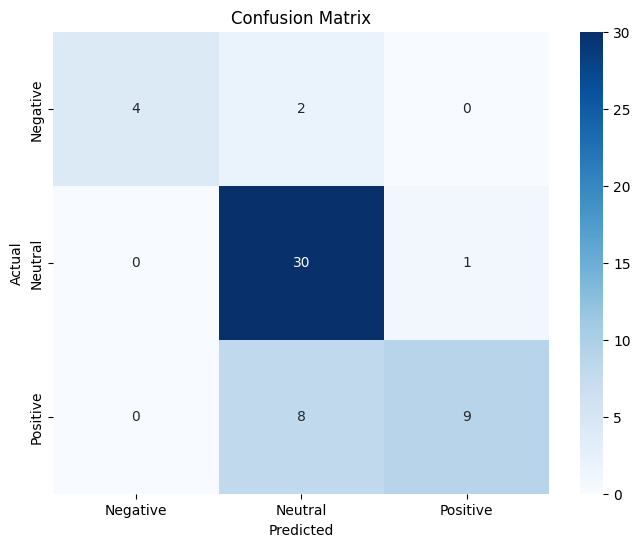

In [11]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
try:
    df = pd.read_csv('/content/reddit_data_with_sentiment.csv')
except FileNotFoundError:
    print("Error: reddit_data_with_sentiment.csv not found in /content/")
    exit()

# Prepare the data
X = df['Title']  # Use 'Title' as the feature
y = df['sentiment']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature extraction using TF-IDF
vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Logistic Regression
model = LogisticRegression()
model.fit(X_train_vec, y_train)

# Predictions
y_pred = model.predict(X_test_vec)

# Evaluation
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Negative', 'Neutral', 'Positive'],
            yticklabels=['Negative', 'Neutral', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

**Naive Bayes**


Naive Bayes Accuracy: 0.7592592592592593
              precision    recall  f1-score   support

    Negative       1.00      0.50      0.67         6
     Neutral       0.70      1.00      0.83        31
    Positive       1.00      0.41      0.58        17

    accuracy                           0.76        54
   macro avg       0.90      0.64      0.69        54
weighted avg       0.83      0.76      0.73        54



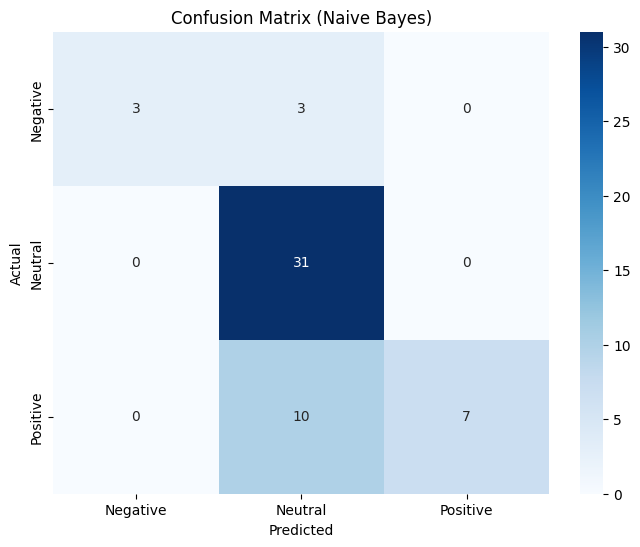

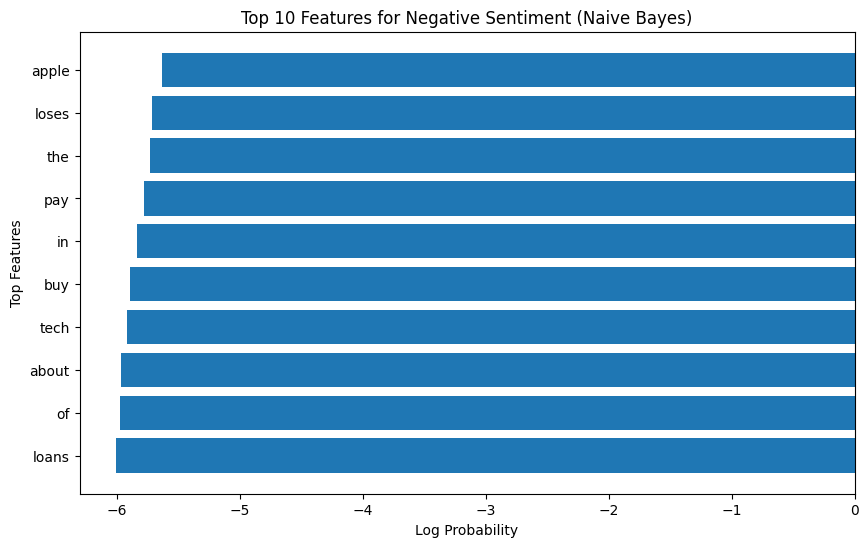

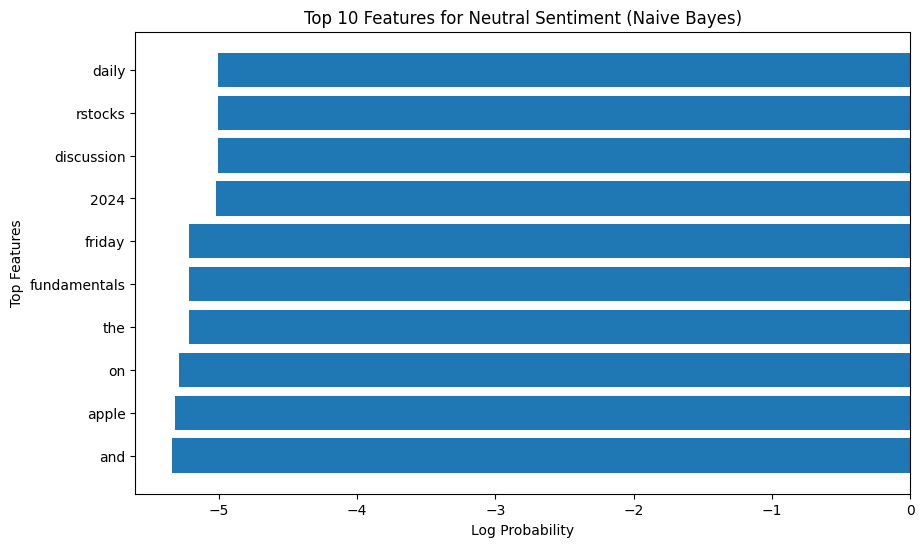

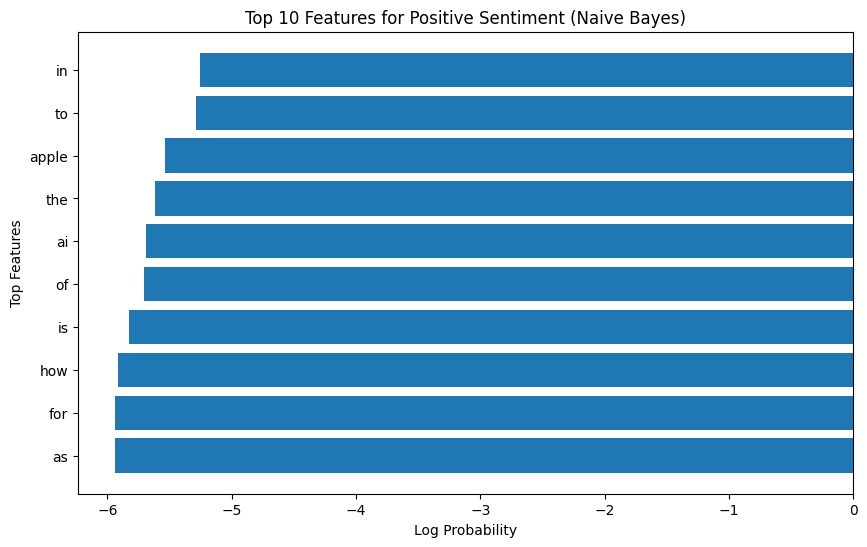

In [9]:
from sklearn.naive_bayes import MultinomialNB
# Naive Bayes
nb_model = MultinomialNB()
nb_model.fit(X_train_vec, y_train)

# Predictions
nb_y_pred = nb_model.predict(X_test_vec)

# Evaluation
nb_accuracy = accuracy_score(y_test, nb_y_pred)
print(f"\nNaive Bayes Accuracy: {nb_accuracy}")
print(classification_report(y_test, nb_y_pred))

# Confusion Matrix for Naive Bayes
nb_cm = confusion_matrix(y_test, nb_y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(nb_cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Negative', 'Neutral', 'Positive'],
            yticklabels=['Negative', 'Neutral', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Naive Bayes)')
plt.show()

# Feature Importance Visualization (for Naive Bayes - Log probabilities)
# Get the feature names from the vectorizer
feature_names = vectorizer.get_feature_names_out()

# Get the log probabilities for each class (positive, negative, neutral)
log_probs = nb_model.feature_log_prob_

# For visualization, we'll focus on the top 10 features for each class
top_features = 10

for i, class_label in enumerate(['Negative', 'Neutral', 'Positive']):
    # Sort the log probabilities in descending order
    top_indices = log_probs[i, :].argsort()[-top_features:][::-1]
    top_words = [feature_names[j] for j in top_indices]
    top_probs = log_probs[i, top_indices]

    # Plot feature importance
    plt.figure(figsize=(10, 6))
    plt.barh(top_words, top_probs)
    plt.xlabel("Log Probability")
    plt.ylabel("Top Features")
    plt.title(f"Top {top_features} Features for {class_label} Sentiment (Naive Bayes)")
    plt.gca().invert_yaxis()  # Invert y-axis to display highest probability at the top
    plt.show()

**Random Forest**


Random Forest Accuracy: 0.7962962962962963
              precision    recall  f1-score   support

    Negative       1.00      0.83      0.91         6
     Neutral       0.74      1.00      0.85        31
    Positive       1.00      0.41      0.58        17

    accuracy                           0.80        54
   macro avg       0.91      0.75      0.78        54
weighted avg       0.85      0.80      0.77        54



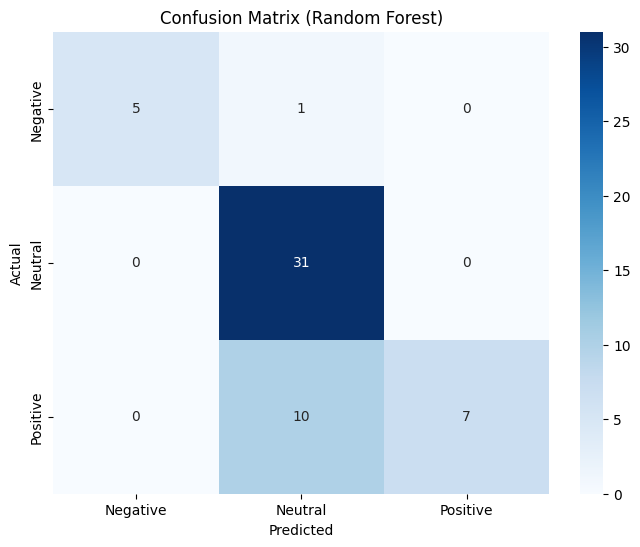

In [12]:

from sklearn.ensemble import RandomForestClassifier

# Load the data
try:
    df = pd.read_csv('/content/reddit_data_with_sentiment.csv')
except FileNotFoundError:
    print("Error: reddit_data_with_sentiment.csv not found in /content/")
    exit()

# Prepare the data
X = df['Title']  # Use 'Title' as the feature
y = df['sentiment']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature extraction using TF-IDF
vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)  # You can adjust hyperparameters here
rf_model.fit(X_train_vec, y_train)

# Predictions
rf_y_pred = rf_model.predict(X_test_vec)

# Evaluation
rf_accuracy = accuracy_score(y_test, rf_y_pred)
print(f"\nRandom Forest Accuracy: {rf_accuracy}")
print(classification_report(y_test, rf_y_pred))

# Confusion Matrix for Random Forest
rf_cm = confusion_matrix(y_test, rf_y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(rf_cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Negative', 'Neutral', 'Positive'],
            yticklabels=['Negative', 'Neutral', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Random Forest)')
plt.show()

**Decision Tree**


Decision Tree Accuracy: 0.7777777777777778
              precision    recall  f1-score   support

    Negative       0.83      0.83      0.83         6
     Neutral       0.83      0.81      0.82        31
    Positive       0.67      0.71      0.69        17

    accuracy                           0.78        54
   macro avg       0.78      0.78      0.78        54
weighted avg       0.78      0.78      0.78        54



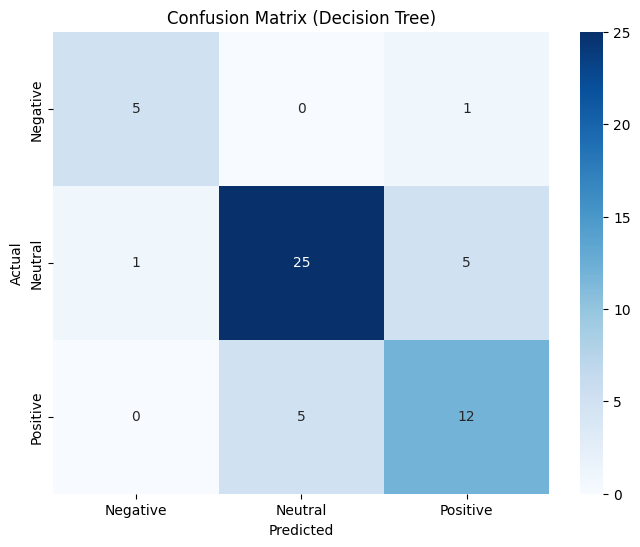

In [13]:
from sklearn.tree import DecisionTreeClassifier

# Load the data (assuming you've already loaded and preprocessed it)
try:
    df = pd.read_csv('/content/reddit_data_with_sentiment.csv')
except FileNotFoundError:
    print("Error: reddit_data_with_sentiment.csv not found in /content/")
    exit()

# Prepare the data
X = df['Title']  # Use 'Title' as the feature
y = df['sentiment']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature extraction using TF-IDF
vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Decision Tree Classifier
dt_model = DecisionTreeClassifier(random_state=42)  # You can adjust hyperparameters here
dt_model.fit(X_train_vec, y_train)

# Predictions
dt_y_pred = dt_model.predict(X_test_vec)

# Evaluation
dt_accuracy = accuracy_score(y_test, dt_y_pred)
print(f"\nDecision Tree Accuracy: {dt_accuracy}")
print(classification_report(y_test, dt_y_pred))

# Confusion Matrix for Decision Tree
dt_cm = confusion_matrix(y_test, dt_y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(dt_cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Negative', 'Neutral', 'Positive'],
            yticklabels=['Negative', 'Neutral', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Decision Tree)')
plt.show()

**AdaBoost**

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(



AdaBoost Accuracy: 0.7592592592592593
              precision    recall  f1-score   support

    Negative       1.00      0.67      0.80         6
     Neutral       0.74      0.94      0.83        31
    Positive       0.73      0.47      0.57        17

    accuracy                           0.76        54
   macro avg       0.82      0.69      0.73        54
weighted avg       0.77      0.76      0.74        54



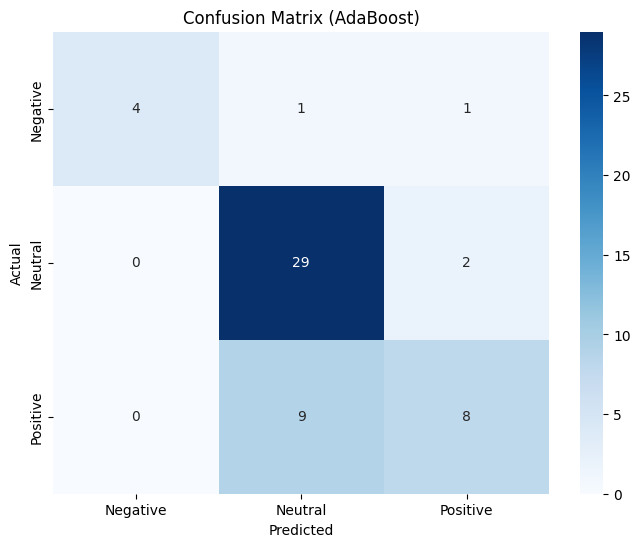

In [20]:


from sklearn.ensemble import AdaBoostClassifier

# Load the data (assuming you've already loaded and preprocessed it)
try:
    df = pd.read_csv('/content/reddit_data_with_sentiment.csv')
except FileNotFoundError:
    print("Error: reddit_data_with_sentiment.csv not found in /content/")
    exit()

# Prepare the data
X = df['Title']  # Use 'Title' as the feature
y = df['sentiment']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature extraction using TF-IDF
vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# AdaBoost Classifier
ada_model = AdaBoostClassifier(random_state=42)  # You can adjust hyperparameters here
ada_model.fit(X_train_vec, y_train)

# Predictions
ada_y_pred = ada_model.predict(X_test_vec)

# Evaluation
ada_accuracy = accuracy_score(y_test, ada_y_pred)
print(f"\nAdaBoost Accuracy: {ada_accuracy}")
print(classification_report(y_test, ada_y_pred))

# Confusion Matrix for AdaBoost
ada_cm = confusion_matrix(y_test, ada_y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(ada_cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Negative', 'Neutral', 'Positive'],
            yticklabels=['Negative', 'Neutral', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (AdaBoost)')
plt.show()

**Correlation between Stock Data and Reddit Sentiment Data**

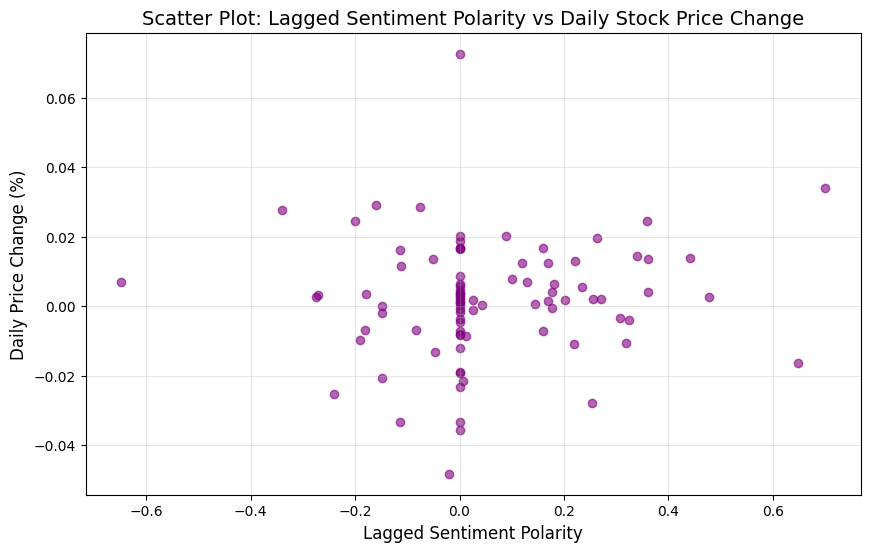

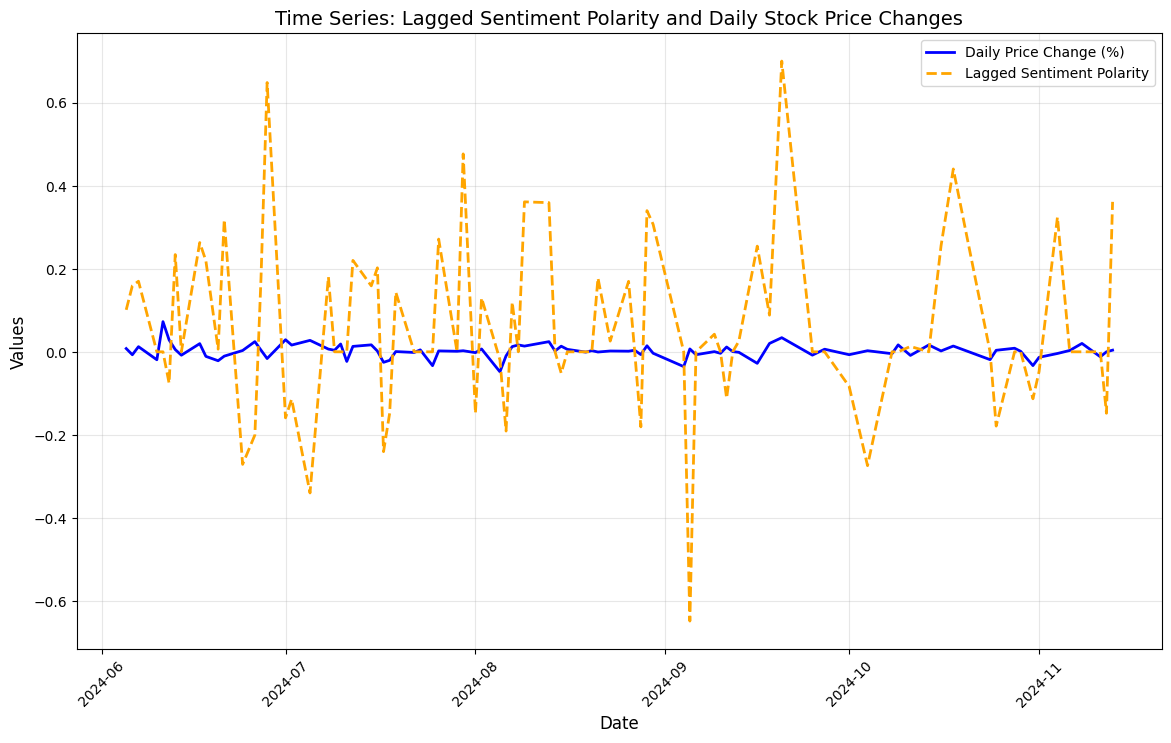

Correlation Matrix:
                 Lagged_Polarity  Price_Change
Lagged_Polarity         1.000000      0.082157
Price_Change            0.082157      1.000000


In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data
apple_stock_data = pd.read_csv('/content/cleaned_apple_stock_data.csv')
reddit_sentiment_data = pd.read_csv('/content/reddit_data_with_sentiment.csv')

# Preprocessing: Convert dates
apple_stock_data['Date'] = pd.to_datetime(apple_stock_data['Date']).dt.date
reddit_sentiment_data['Date'] = pd.to_datetime(reddit_sentiment_data['Date']).dt.date

# Aggregate sentiment polarity by date
reddit_sentiment_summary = reddit_sentiment_data.groupby('Date')['sentiment_score'].mean().reset_index()

# Merge datasets on Date
merged_data = pd.merge(apple_stock_data, reddit_sentiment_summary, on='Date', how='inner')

# Feature Engineering
# 1. Lagging Sentiment Polarity
merged_data['Lagged_Polarity'] = merged_data['sentiment_score'].shift(1)

# 2. Daily Stock Price Percentage Change
merged_data['Price_Change'] = merged_data['Adj Close'].pct_change()

# Drop NaN values (introduced by lagging and percentage change)
cleaned_data = merged_data.dropna()

# Correlation Analysis
correlation_matrix = cleaned_data[['Lagged_Polarity', 'Price_Change']].corr()

# Visualizations
plt.figure(figsize=(10, 6))
plt.scatter(cleaned_data['Lagged_Polarity'], cleaned_data['Price_Change'], alpha=0.6, c='purple')
plt.title("Scatter Plot: Lagged Sentiment Polarity vs Daily Stock Price Change", fontsize=14)
plt.xlabel("Lagged Sentiment Polarity", fontsize=12)
plt.ylabel("Daily Price Change (%)", fontsize=12)
plt.grid(alpha=0.3)
plt.show()

# Time-series visualization
plt.figure(figsize=(14, 8))
plt.plot(cleaned_data['Date'], cleaned_data['Price_Change'], label="Daily Price Change (%)", color="blue", linewidth=2)
plt.plot(cleaned_data['Date'], cleaned_data['Lagged_Polarity'], label="Lagged Sentiment Polarity", color="orange", linestyle="--", linewidth=2)
plt.title("Time Series: Lagged Sentiment Polarity and Daily Stock Price Changes", fontsize=14)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Values", fontsize=12)
plt.legend()
plt.grid(alpha=0.3)
plt.xticks(rotation=45)
plt.show()

# Print correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)